# Prequsites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

# Task1- Numpy

In [5]:
image_1 = np.zeros((300, 300))

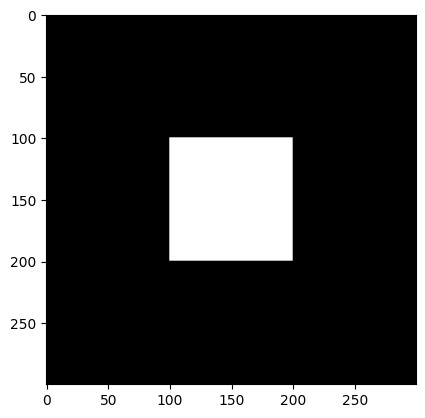

In [4]:
image_1[100:200, 100:200] = 255
displayImage(image_1)

#  Task 2 - Image concatenation 

In [14]:
image_2_1 = cv2.imread("./task-assets/concat1.jpg", 0)
image_2_2 = cv2.imread("./task-assets/concat2.jpg", 0)
image_2_3 = cv2.imread("./task-assets/concat3.jpg", 0)

print("Shape: ", image_2_1.shape)
print("Shape: ", image_2_2.shape)
print("Shape: ", image_2_3.shape)

Shape:  (333, 301, 3)
Shape:  (333, 333, 3)
Shape:  (333, 238, 3)


In [16]:
cv2.imshow("Cat 1", image_2_1)
cv2.imshow("Cat 2", image_2_2)
cv2.imshow("Cat 3", image_2_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

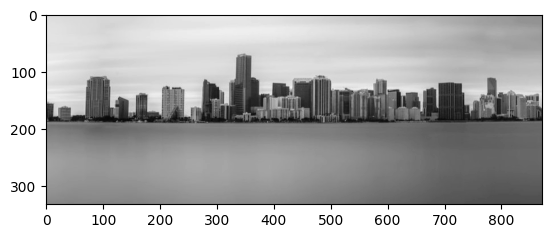

In [13]:
# Create new image of 3 images beside
rows = 333
columns = image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]
concatenated = np.zeros((rows, columns))
# Copy each section to corrosponding image
concatenated[:, :image_2_1.shape[1]] = image_2_1
concatenated[:, image_2_1.shape[1] :image_2_1.shape[1] + image_2_2.shape[1]] = image_2_2
concatenated[:, image_2_1.shape[1] + image_2_2.shape[1]:image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]] = image_2_3
displayImage(concatenated) 

Trial to show colored image

In [21]:
image_2_1 = cv2.imread("./task-assets/concat1.jpg")
image_2_2 = cv2.imread("./task-assets/concat2.jpg")
image_2_3 = cv2.imread("./task-assets/concat3.jpg")

# Create new image of 3 images beside
rows = 333
columns = image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1]
concatenated = np.zeros((rows, columns, 3))
# Copy each section to corrosponding image
concatenated[:, :image_2_1.shape[1] , :] = image_2_1
concatenated[:, image_2_1.shape[1] :image_2_1.shape[1] + image_2_2.shape[1], :] = image_2_2
concatenated[:, image_2_1.shape[1] + image_2_2.shape[1]:image_2_1.shape[1] + image_2_2.shape[1] + image_2_3.shape[1], :] = image_2_3

cv2.imshow("Cat coloured", concatenated)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 3 - Thresholding

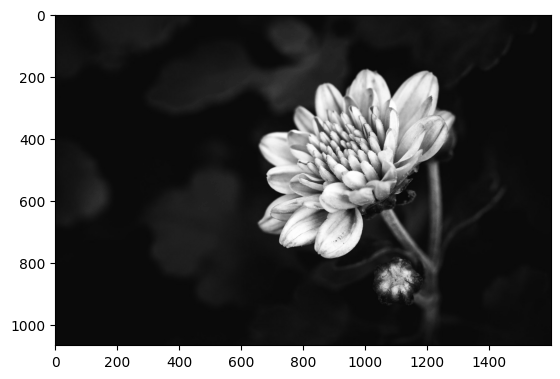

(1067, 1600)

In [24]:
image_3 = cv2.imread("./task-assets/threshold.jpg", 0)
displayImage(image_3)
image_3.shape